In [1]:
# used ordered vector in stan code vaiable declaration

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pystan
import pandas as pd
from scipy.special import expit as logistic
import arviz as az

np.set_printoptions(precision=2, suppress = True)

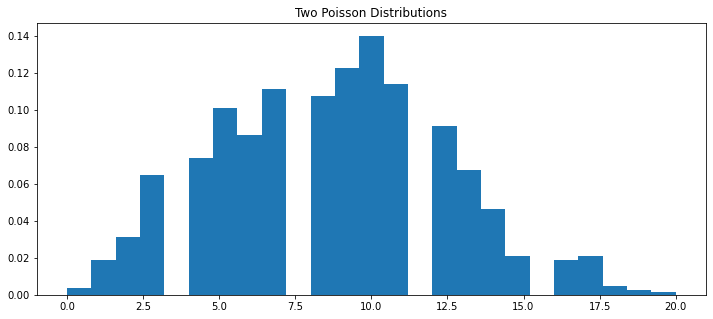

In [3]:
K = 2

A_lambda = 5
B_lambda = 10

A_num = 300
B_num = 700
total = A_num + B_num

A = np.random.poisson(A_lambda, A_num)
B = np.random.poisson(B_lambda, B_num)

X = np.concatenate([A, B])

plt.figure(figsize=(12, 5))
plt.title('Two Poisson Distributions')
plt.hist(X, bins = 25, density = True)
plt.show()

In [4]:
stan_data = {
    'N': total,
    'K': K,
    'X': X,
}

In [5]:
stan_code = """
data{
    int N;
    int K;
    int X[N];
}

parameters {
    ordered[K] lambda;
    simplex[K] pi;
}

model {
    real lp[K];
    pi ~ beta(5, 5);
    
    for(n in 1:N){
        for (k in 1:K){
            lp[k] = log(pi[k]) + poisson_lpmf(X[n] | lambda[k]);
        }
        target += log_sum_exp(lp);
    }
}
"""

In [6]:
sm = pystan.StanModel(model_code= stan_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e4df1af789e6e6fd53383743f65b17c5 NOW.


In [7]:
mcmc_result = sm.sampling(
    data=stan_data,
    chains=4,
    iter=3000,
    warmup=2000,
    thin=1
)

In [8]:
print(mcmc_result)

Inference for Stan model: anon_model_e4df1af789e6e6fd53383743f65b17c5.
4 chains, each with iter=3000; warmup=2000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
lambda[1]   4.53  7.8e-3   0.28   3.98   4.34   4.53   4.72   5.08   1289    1.0
lambda[2]  10.01  3.3e-3   0.17   9.68   9.89  10.01  10.13  10.37   2802    1.0
pi[1]       0.26  8.0e-4   0.03    0.2   0.24   0.26   0.28   0.33   1507    1.0
pi[2]       0.74  8.0e-4   0.03   0.67   0.72   0.74   0.76    0.8   1507    1.0
lp__       -2736    0.03   1.18  -2740  -2737  -2736  -2736  -2735   1275    1.0

Samples were drawn using NUTS at Thu Oct  7 10:05:28 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


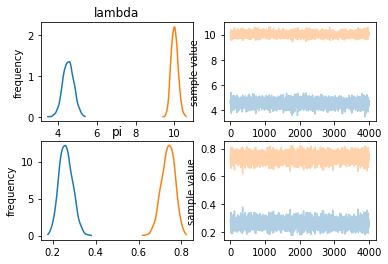

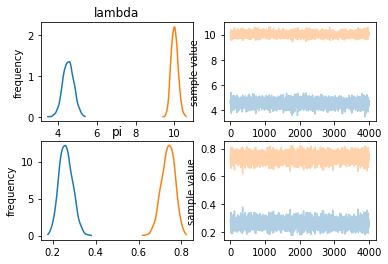

In [9]:
mcmc_result.plot()

In [10]:
print('True_lambda: ', A_lambda, B_lambda)
print('Estimated lambda: ', mcmc_result['lambda[1]'].mean(), mcmc_result['lambda[2]'].mean())

True_lambda:  5 10
Estimated lambda:  4.52899442182825 10.010580693948992


In [11]:
print('True_pi: ', A_num/total, B_num/total)
print('Estimated lambda: ', mcmc_result['pi[1]'].mean(), mcmc_result['pi[2]'].mean())

True_pi:  0.3 0.7
Estimated lambda:  0.26219039940534605 0.737809600594654
